In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sklearn
import tensorflow as tf

In [2]:
root_path = os.getcwd()
parent_path = os.path.dirname(root_path)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
## For Notebook
# root_directory = 'C:/git/explic-ai-tsc'    

## For PC
root_directory = 'D:/git/explic-ai-tsc'

In [3]:
from utils.utils import read_all_datasets
from utils.utils import shape_data
from utils.constants import DATASETS_NAMES

## Load Data sets

In [4]:
dataset_dict = read_all_datasets(root_directory, 'UCRArchive_2018')

curr_dataset = 'ECG5000'

x_train, y_train, x_test, y_test, y_true, nb_classes, input_shape = shape_data(dataset_dict[curr_dataset])

## Load Pretrained Model (MLP)

In [5]:
from classifiers import MLP

In [6]:

output_directory_model = root_directory + '/results/MLP/UCRArchive_2018_itr_0/ECG5000/'
model = MLP(output_directory_model, input_shape, nb_classes, verbose=True, build=False)

## Load Explanation Method

In [7]:
from utils.utils import plot_relevance

from explanations import LimeTimeSeriesExplainer
from explanations import OcclusionSensitivityUTS
from explanations import RiseUTS

In [8]:
data2explain = x_test[:10]
ytrue4data2explain = y_true[:10]

In [9]:
# explainer_limets = LimeTimeSeriesExplainer()

# relevance_lime_dtw = explainer_limets.explain_instance(
#     data2explain[0], 
#     ytrue4data2explain[0], 
#     model, 
#     labels=y_true,
#     patch_size=5,
#     distance_metric='dtw',
#     num_samples=1000
# )

# relevance_lime_euc = explainer_limets.explain_instance(
#     data2explain[0], 
#     ytrue4data2explain[0], 
#     model, 
#     labels=y_true,
#     patch_size=5,
#     distance_metric='euclidean',
#     num_samples=1000
# )

# relevance_lime_cos = explainer_limets.explain_instance(
#     data2explain[0], 
#     ytrue4data2explain[0], 
#     model, 
#     labels=y_true,
#     patch_size=5,
#     distance_metric='cosine',
#     num_samples=1000
# )

In [10]:
# plot_relevance(data2explain[0], relevance_lime[0])

# plot_relevance(data2explain[0], relevance_lime_dtw)
# plot_relevance(data2explain[0], relevance_lime_euc)
# plot_relevance(data2explain[0], relevance_lime_cos)

In [30]:
explainer_limets = RiseUTS()

relevance_rise_linear = explainer_limets.explain_instance(
    data2explain[0], 
    ytrue4data2explain[0], 
    model,
    interpolation='linear'
)

relevance_rise_fourier = explainer_limets.explain_instance(
    data2explain[0], 
    ytrue4data2explain[0], 
    model,
    interpolation='fourier'
)

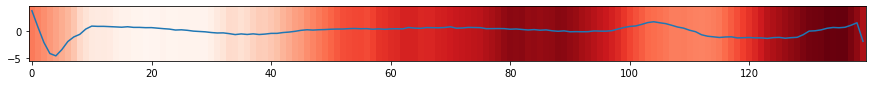

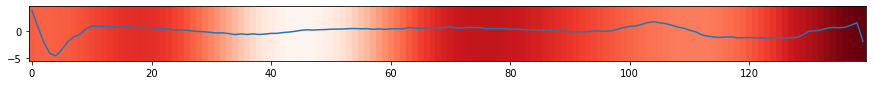

In [31]:
plot_relevance(data2explain[0], relevance_rise_linear)
plot_relevance(data2explain[0], relevance_rise_fourier)

In [13]:
import scipy

In [14]:
arr = [1, 0, 4, 2, 1]

In [15]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

In [16]:
np.interp(np.arange(0, len(a), 1.5), np.arange(0, len(a)), a)

array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. ])

In [17]:
np.arange(0, len(a), 1.5)

array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ])

In [18]:
np.arange(0, len(a))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
np.arange(0, len(a), 1.833333333)

array([0.        , 1.83333333, 3.66666667, 5.5       , 7.33333333,
       9.16666666])

In [21]:
np.arange(0, len(a), 1.5), np.arange(0, len(a)), a

(array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [22]:
from scipy.interpolate import interp1d

In [23]:
def resample_t(x, factor, kind='linear'):
    n = int(np.ceil(x.size / factor))
    f = interp1d(np.linspace(0, 1, x.size), x, kind)
    print(f)
    return f(np.linspace(0, 1, n))

In [24]:
arr = np.array([2, 1, 0, 1, 2])

In [25]:
5/10

resample_t(arr, .48)

array([2. , 1.6, 1.2, 0.8, 0.4, 0. , 0.4, 0.8, 1.2, 1.6, 2. ])

In [26]:
from scipy.interpolate import interp1d

In [27]:
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\tf-gpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

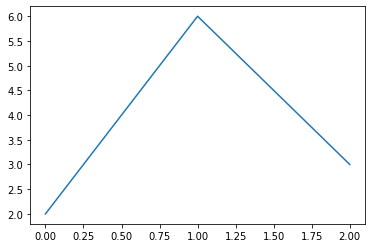

In [28]:
arr_nnnnn = np.array([2,6,3])

plt.plot(arr_nnnnn)

In [29]:
len(arr_nnnnn)

3

In [34]:
loaded = np.loadtxt(root_directory+'/results/MLP/UCRArchive_2018_itr_0/BeetleFly/explanations/occlusion_mean_ps_1.csv', delimiter=',')

In [35]:
loaded.shape

(20, 512)

In [41]:
mask_size = 28

mask_init = 0.5*np.ones((mask_size), dtype = np.float32)

In [42]:
mask_init.shape

(28,)

In [43]:
mask_init

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5], dtype=float32)

In [47]:
5 + \
5

10